In [8]:


import simtool.simtool as simtool

# Run all builds with a problem size L=1000
df_results = simtool.compiler_test()
print(df_results)


Building preset 'gcc-O3' for L=384 ...
Building preset 'clang-O3' for L=384 ...
Building preset 'icx-O3' for L=384 ...
Building preset 'gcc-O3-march-native' for L=384 ...
Building preset 'clang-O3-march-native' for L=384 ...
Building preset 'icx-O3-march-native' for L=384 ...
Building preset 'gcc-O2' for L=384 ...
Building preset 'clang-O2' for L=384 ...
Building preset 'icx-O2' for L=384 ...
{'compiler': 'clang', 'optimization_flags': '-O2', 'L': 384, 'metric': 42.709697, 'error': None}
{'compiler': 'clang', 'optimization_flags': '-O3', 'L': 384, 'metric': 44.269795, 'error': None}
{'compiler': 'icx', 'optimization_flags': '-O3 -march=native', 'L': 384, 'metric': 42.896631, 'error': None}
{'compiler': 'icx', 'optimization_flags': '-O3', 'L': 384, 'metric': 43.744627, 'error': None}
{'compiler': 'gcc', 'optimization_flags': '-O2', 'L': 384, 'metric': 52.231151, 'error': None}
{'compiler': 'clang', 'optimization_flags': '-O3 -march=native', 'L': 384, 'metric': 51.872771, 'error': None}


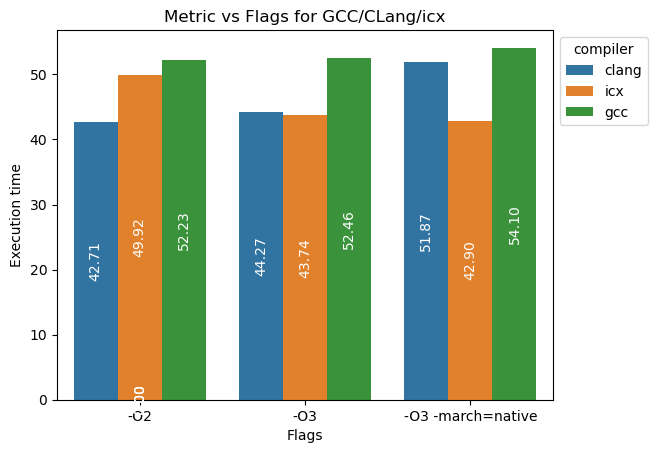

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.barplot(x='optimization_flags', y='metric', hue='compiler',legend='full',  data=df_results)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Add labels with the value of each bar
for rect in ax.patches:
    # Get the height and width of the bar
    height = rect.get_height()
    width = rect.get_width()

    # Get the x and y coordinates of the bar
    x = rect.get_x()
    y = rect.get_y()

    # Add a label with the value of the bar
    ax.text(x + width/2, y + height/2, '{:.2f}'.format(height), ha='center', va='center', color='white', rotation=90)
    

# Set the plot title and axis labels
plt.title('Metric vs Flags for GCC/CLang/icx')
plt.xlabel('Flags')
plt.ylabel('Execution time')


# plt.xticks(df.L.unique(), rotation=90)

# Show the plot
plt.show()

In [11]:
import simtool.simtool as simtool

L_values = [100,200,300,400,500,600,700,800,900,1000]
df_results_L = simtool.problem_size_test(L_values)
print(df_results)

Building preset 'gcc-O3' for L=100 ...
Building preset 'gcc-O3' for L=200 ...
Building preset 'gcc-O3' for L=300 ...
Building preset 'gcc-O3' for L=400 ...
Building preset 'gcc-O3' for L=500 ...
Building preset 'gcc-O3' for L=600 ...
Building preset 'gcc-O3' for L=700 ...
Building preset 'gcc-O3' for L=800 ...
Building preset 'gcc-O3' for L=900 ...
Building preset 'gcc-O3' for L=1000 ...
{'compiler': 'gcc', 'optimization_flags': '-O3', 'L': 100, 'metric': 4.573612, 'error': None}
{'compiler': 'gcc', 'optimization_flags': '-O3', 'L': 200, 'metric': 14.515832, 'error': None}
{'compiler': 'gcc', 'optimization_flags': '-O3', 'L': 300, 'metric': 28.27711, 'error': None}
{'compiler': 'gcc', 'optimization_flags': '-O3', 'L': 400, 'metric': 46.562832, 'error': None}
{'compiler': 'gcc', 'optimization_flags': '-O3', 'L': 500, 'metric': 71.986595, 'error': None}
{'compiler': 'gcc', 'optimization_flags': '-O3', 'L': 600, 'metric': 95.695436, 'error': None}
{'compiler': 'gcc', 'optimization_flags':

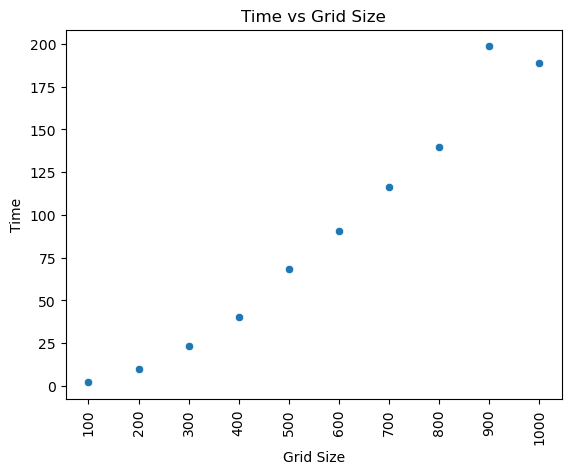

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Use seaborn to create a line plot
sns.scatterplot(x='L', y='metric', data=df_results)

# Set the plot title and axis labels
plt.title('Time vs Grid Size')
plt.xlabel('Grid Size')
plt.ylabel('Time')
plt.xticks(df_results.L.unique(), rotation=90)

# Show the plot
plt.show()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

def scale(arr):
    return np.divide(arr,L*L)

# note the double square brackets around the 'x'!!
# this is because we want to use DataFrame.apply,
# not Series.apply!!
df_metric = df_results
df_metric['metric'] = df[['metric']].apply(scale)


# Use seaborn to create a line plot
sns.scatterplot(x='L', y='metric', data=df_results)

# Set the plot title and axis labels
plt.title('Metric vs Grid Size')
plt.xlabel('Grid Size')
plt.ylabel('Time')
plt.xticks(df_results.L.unique(), rotation=90)

# Show the plot
plt.show()

NameError: name 'df_results' is not defined

In [5]:
import simtool.simtool as simtool

profile_result = simtool.build_and_profile(L=348, stat_n=5)
print(profile_result)

Building preset 'gcc-O3_profile' for L=348 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/gcc-O3_profile_348 ...
Profiling binary using perf for preset 'gcc-O3_profile' with L=348 in /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/results/gcc-O3_profile_348_profile ...
{'compiler': 'gcc', 'optimization_flags': '-O3', 'L': 348, 'profile': None, 'error': "'utf-8' codec can't decode byte 0xd0 in position 67: invalid continuation byte"}


In [8]:
import simtool.simtool as simtool

print(simtool.parse_perf_output('/home/lfissore/Documents/Facultad/paralela2025/tiny_ising/results/gcc-O3_profile_348_profile/stat_out'))

{'task-clock': 20775.87, 'context-switches': 0.0, 'cpu-migrations': 0.0, 'page-faults': 196.0, 'instructions': 78532181386.0, 'cycles': 49492420971.0, 'branches': 11732703336.0, 'branch-misses': 299484018.0, 'L1-dcache-loads': 20290682507.0, 'L1-dcache-load-misses': 47940658.0, 'LLC-loads': 2312637.0, 'LLC-load-misses': 699488.0, 'L1-icache-load-misses': 1911012.0, 'dTLB-loads': 20321686128.0, 'dTLB-load-misses': 172416.0, 'iTLB-loads': 578819.0, 'iTLB-load-misses': 25521.0, 'time_elapsed': 21.01}


In [33]:

import simtool.simtool as simtool

# Run all builds with a problem size L=1000
df_results = simtool.build_and_run('gcc-O3', L=1000)
print(df_results)

Building preset 'gcc-O3' for L=1000 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/gcc-O3_1000 ...
{'compiler': 'gcc', 'optimization_flags': '-O3', 'L': 1000, 'metric': 149.136153, 'error': None}


     # Temp         E       E^2        E^4         M       M^2           M^4
0      1.50 -1.950802  3.805627  14.482800  0.986380  0.972946  9.466230e-01
1      1.51 -1.949371  3.800049  14.440379  0.985931  0.972060  9.449000e-01
2      1.52 -1.946591  3.789218  14.358178  0.985131  0.970484  9.418384e-01
3      1.53 -1.944964  3.782886  14.310249  0.984676  0.969587  9.400993e-01
4      1.54 -1.942920  3.774939  14.250167  0.984079  0.968411  9.378202e-01
..      ...       ...       ...        ...       ...       ...           ...
146    2.96 -0.834021  0.695593   0.483854  0.003194  0.000015  4.000000e-10
147    2.97 -0.829498  0.688068   0.473439  0.003162  0.000012  2.000000e-10
148    2.98 -0.826103  0.682449   0.465745  0.003488  0.000021  1.100000e-09
149    2.99 -0.821780  0.675323   0.456064  0.002969  0.000014  6.000000e-10
150    3.00 -0.817568  0.668423   0.446804  0.003126  0.000016  6.000000e-10

[151 rows x 7 columns]


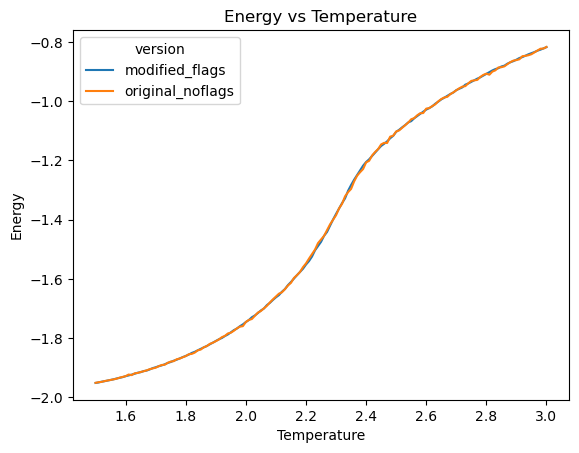

In [ ]:
import pandas as pd 

df = pd.read_csv('results/gcc-O3_1000/table')
print(df)

# # Load data into a pandas dataframe
# df = pd.read_csv('../results/LAB1/sim_results_modified_code_flags_xorshift.csv')
df['version'] = 'modified'
df1 = pd.read_csv('results/gcc-O3_384/table')
df1['version'] = 'original'

df = pd.concat([df, df1])
# Use seaborn to create a line plot
sns.lineplot(x='# Temp', y='E', hue='version' , data=df)

# Set the plot title and axis labels
plt.title('Energy vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Energy')

# Show the plot
plt.show()
